# KNN - Mejor separación por TSNE

En este notebook se buscará la mejor combinación de atributos de forma tal que generen un patrón observable con TSNE, para luego clasificar con KNN el dataset transformado.

#### Bibliotecas

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import utils
import preprocessing

In [2]:
df = utils.feature_engineering(utils.get_data())

In [3]:
def dejar_variables_continuas(X):
    return X[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina',
              'edad', 'horas_trabajo_registradas']].copy()

In [4]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = pd.get_dummies(X)
Y = df['tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=112)

### 1) Análisis sólo de variables continuas

In [5]:
scaler1 = MinMaxScaler(feature_range=(0,1))

X_train1 = pd.DataFrame(scaler1.fit_transform(dejar_variables_continuas(X_train)))
X_test1 = pd.DataFrame(scaler1.transform(dejar_variables_continuas(X_test)))

In [6]:
X_tsne = TSNE(learning_rate=400, n_iter_without_progress=500, n_jobs=-1, verbose=4).fit_transform(X_train1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.539s...
[t-SNE] Computed neighbors for 24420 samples in 1.777s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sam

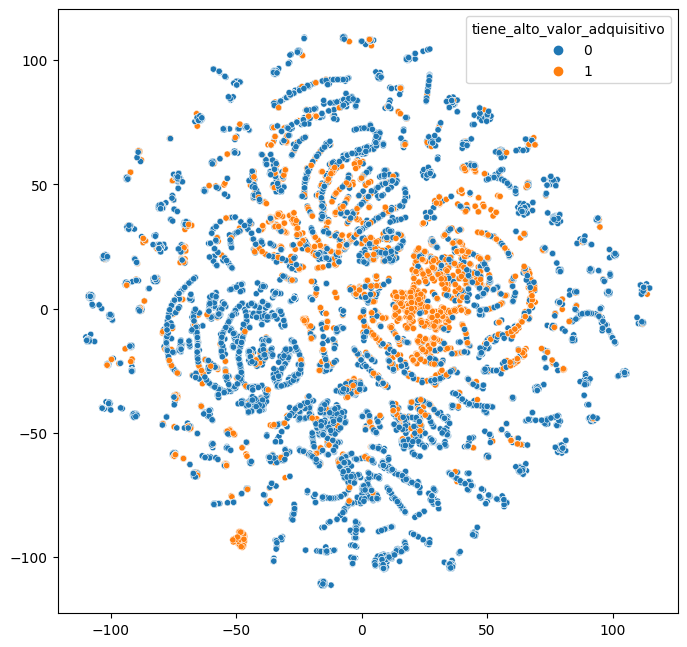

In [7]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=20
)

plt.show()

Podemos ver que la separación no es mala, habiendo regiones con una clara concentración de muestras con alto valor adquisitivo. Veamos que ocurre al entrenar un modelo de KNN. Esta vez, dejaremos que el clasificador elija el algoritmo para computar los vecinos más cercanos.

### Entrenando el primer modelo

In [28]:
params = { 'n_neighbors': range(10,100,5), 
          'weights': ('uniform', 'distance'),
          'algorithm': ('ball_tree', 'kd_tree'),
          'p': range(1,3) }

model = KNeighborsClassifier()

gscv1 = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose = 10)

In [29]:
%%time
gscv1.fit(X_train1, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

CPU times: user 4.22 s, sys: 392 ms, total: 4.61 s
Wall time: 6min 19s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('ball_tree', 'kd_tree'),
                         'n_neighbors': range(10, 100, 5), 'p': range(1, 3),
                         'weights': ('uniform', 'distance')},
             scoring='roc_auc', verbose=10)

### El mejor modelo:

In [30]:
print(gscv1.best_estimator_)
print(gscv1.best_params_)
print(gscv1.best_score_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=70)
{'algorithm': 'ball_tree', 'n_neighbors': 70, 'p': 2, 'weights': 'uniform'}
0.8363176080198897


##### Observaciones

TBD

In [31]:
gscv1.cv_results_

{'mean_fit_time': array([0.38378062, 0.39960766, 0.35199094, 0.33936467, 0.35847669,
        0.37606325, 0.43488374, 0.38875203, 0.34644427, 0.40185561,
        0.40842843, 0.47048945, 0.47734351, 0.48628359, 0.47123327,
        0.46991673, 0.50760045, 0.50505414, 0.51745872, 0.46014762,
        0.35410299, 0.42036242, 0.34083476, 0.3181047 , 0.41444006,
        0.35250392, 0.35269985, 0.35683427, 0.39311457, 0.44411755,
        0.46647682, 0.47155356, 0.49000306, 0.62211142, 0.50566826,
        0.32880883, 0.36145153, 0.36667089, 0.39603729, 0.36604943,
        0.35775871, 0.35578327, 0.44449115, 0.48336601, 0.37275109,
        0.38603864, 0.39364576, 0.37413831, 0.34364638, 0.32713985,
        0.35684018, 0.3329628 , 0.33613286, 0.35191274, 0.34066911,
        0.33168764, 0.34068475, 0.3498879 , 0.32838736, 0.31940517,
        0.3349791 , 0.32970161, 0.31604338, 0.31417174, 0.34255552,
        0.33497705, 0.33800793, 0.32038422, 0.33410354, 0.34772625,
        0.3276854 , 0.32790256,

In [32]:
print(classification_report(y_test,gscv1.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6182
           1       0.70      0.39      0.50      1959

    accuracy                           0.81      8141
   macro avg       0.77      0.67      0.69      8141
weighted avg       0.80      0.81      0.79      8141



Obtenemos un accuracy aceptable, con un recall muy pobre para los 1s, por lo que consideramos que la selección de variables no fue buena. Veamos con otras combinaciones.

De forma similar a lo realizado con SVM, nos quedaremos con las siguientes variables:
 * Edad
 * Ganancia/Pérdida declarada en la bolsa argentina
 * Años estudiados

In [23]:
def dejar_mejores_variables_continuas(X):
    return X[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina',
              'edad']].copy()

In [24]:
scaler2 = MinMaxScaler(feature_range=(0,1))

X_train2 = pd.DataFrame(scaler2.fit_transform(dejar_mejores_variables_continuas(X_train)))
X_test2 = pd.DataFrame(scaler2.transform(dejar_mejores_variables_continuas(X_test)))

Veamos si TSNE nos muestra algo interesante:

In [25]:
X_tsne = TSNE(n_components=2, perplexity=200, learning_rate=100, n_iter_without_progress=250, n_jobs=-1, verbose=4).fit_transform(X_train2)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.442s...
[t-SNE] Computed neighbors for 24420 samples in 6.966s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sa

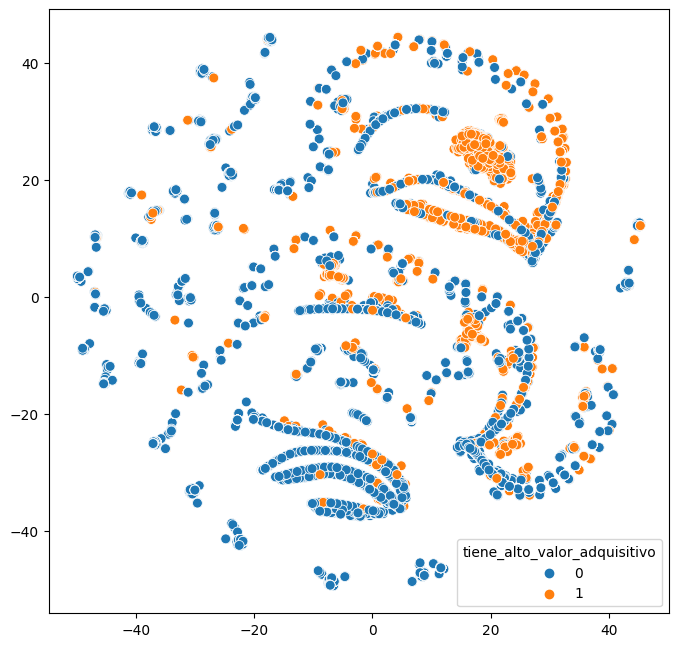

In [26]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=50
)

plt.show()

No parece haber ningún tipo de patrón visible, aunque hay algunas regiones con más concentración de 1s.

In [33]:
params = { 'n_neighbors': range(10,100,5), 
          'weights': ('uniform', 'distance'),
          'algorithm': ('ball_tree', 'kd_tree'),
          'p': range(1,3) }

model = KNeighborsClassifier()

gscv3 = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose = 10)

In [34]:
%%time
gscv3.fit(X_train2, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

CPU times: user 4.03 s, sys: 232 ms, total: 4.26 s
Wall time: 3min 59s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('ball_tree', 'kd_tree'),
                         'n_neighbors': range(10, 100, 5), 'p': range(1, 3),
                         'weights': ('uniform', 'distance')},
             scoring='roc_auc', verbose=10)

### El mejor modelo:

In [35]:
print(gscv3.best_estimator_)
print(gscv3.best_params_)
print(gscv3.best_score_)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=85)
{'algorithm': 'kd_tree', 'n_neighbors': 85, 'p': 2, 'weights': 'uniform'}
0.8295416430648357


Vemos que esta vez el modelo es distinto, con una leve mejora en el score. 

In [36]:
print(classification_report(y_test,gscv3.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6182
           1       0.71      0.36      0.47      1959

    accuracy                           0.81      8141
   macro avg       0.77      0.65      0.68      8141
weighted avg       0.80      0.81      0.79      8141



Con valores e interpretaciones similares a las anteriores.

### Veamos qué sucede si elegimos las primeras variables (no sólo continuas) que elije un árbol de decisión de altura 3. 

Repitiendo la selección realizada para el caso de SVM, nos quedaremos con las siguientes variables seleccionadas con un árbol de altura 3:

* Rol familiar registrado casado
* Ganancia/Pérdida declarada en la bolsa argentina.
* Años estudiados.
* Edad

In [37]:
def primeras_4_del_arbol(X):
    return X[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina',
              'edad', 'rol_familiar_registrado_casado']].copy()

In [38]:
scaler3 = MinMaxScaler(feature_range=(0,1))

X_train3 = pd.DataFrame(scaler3.fit_transform(primeras_4_del_arbol(X_train)))
X_test3 = pd.DataFrame(scaler3.transform(primeras_4_del_arbol(X_test)))

Nuevamente veamos qué nos dice TSNE

In [39]:
X_tsne = TSNE(n_components=2, perplexity=100, learning_rate=100, n_iter_without_progress=250, n_jobs=-1, verbose=4).fit_transform(X_train3)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 24420 samples in 0.370s...
[t-SNE] Computed neighbors for 24420 samples in 3.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24420
[t-SNE] Computed conditional probabilities for sample 2000 / 24420
[t-SNE] Computed conditional probabilities for sample 3000 / 24420
[t-SNE] Computed conditional probabilities for sample 4000 / 24420
[t-SNE] Computed conditional probabilities for sample 5000 / 24420
[t-SNE] Computed conditional probabilities for sample 6000 / 24420
[t-SNE] Computed conditional probabilities for sample 7000 / 24420
[t-SNE] Computed conditional probabilities for sample 8000 / 24420
[t-SNE] Computed conditional probabilities for sample 9000 / 24420
[t-SNE] Computed conditional probabilities for sample 10000 / 24420
[t-SNE] Computed conditional probabilities for sample 11000 / 24420
[t-SNE] Computed conditional probabilities for sample 12000 / 24420
[t-SNE] Computed conditional probabilities for sa

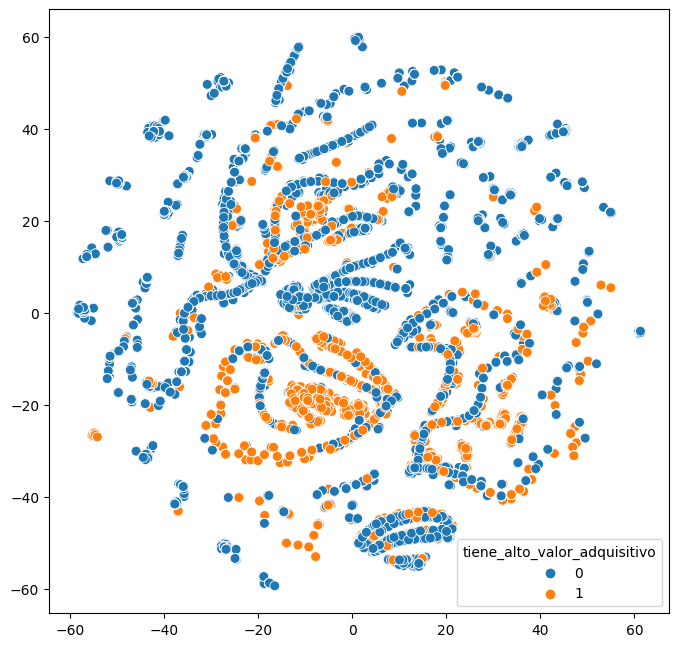

In [40]:
fig = plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    hue = y_train,
    s=50
)

plt.show()

Nuevamente vemos que no hay un patrón distinguible, pero repetiremos el procedimiento anterior para comparar modelos y resultados obtenidos.

In [41]:
params = { 'n_neighbors': range(10,100,5), 
          'weights': ('uniform', 'distance'),
          'algorithm': ('ball_tree', 'kd_tree'),
          'p': range(1,3) }

model = KNeighborsClassifier()

gscv4 = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose = 10)

In [42]:
%%time
gscv4.fit(X_train3, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

CPU times: user 4.46 s, sys: 380 ms, total: 4.84 s
Wall time: 4min 24s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('ball_tree', 'kd_tree'),
                         'n_neighbors': range(10, 100, 5), 'p': range(1, 3),
                         'weights': ('uniform', 'distance')},
             scoring='roc_auc', verbose=10)

In [43]:
print(gscv4.best_estimator_)
print(gscv4.best_params_)
print(gscv4.best_score_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=55)
{'algorithm': 'ball_tree', 'n_neighbors': 55, 'p': 2, 'weights': 'uniform'}
0.887921657878295


In [44]:
print(classification_report(y_test,gscv4.predict(X_test3)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6182
           1       0.71      0.54      0.61      1959

    accuracy                           0.84      8141
   macro avg       0.79      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141



Contrariamente a nuestra expectativa inicial, obtuvimos un nuevo modelo con un score notablemente mejor, pero que sigue sin superar a los obtenidos anteriormente con otros preprocesamientos.

### Variables no continuas

Al igual que en el caso de SVM, nos quedaremos con las siguientes variables para continuar nuestro análisis:

* religion_budismo
* trabajo_entretenimiento
* rol_familiar_registrado_otro


In [45]:
# La función deja las continuas que resultaron significativas para los previos árboles, la variable de 
# rol_familiar_registrado_casado pues antes también había resultado importante junto a las continuas.
# Pero además suma las 3 variables arriba mencionadas.
def quedarse_las_importantes(X):
    return X[['anios_estudiados', 'ganancia_perdida_declarada_bolsa_argentina',
              'edad', 'rol_familiar_registrado_casado', 'religion_budismo', 
              'trabajo_entretenimiento', 'rol_familiar_registrado_otro']].copy()

In [46]:
scaler4 = MinMaxScaler(feature_range=(0,1))

X_train4 = pd.DataFrame(scaler4.fit_transform(quedarse_las_importantes(X_train)))
X_test4 = pd.DataFrame(scaler4.transform(quedarse_las_importantes(X_test)))

In [47]:
params = { 'n_neighbors': range(10,100,5), 
          'weights': ('uniform', 'distance'),
          'algorithm': ('ball_tree', 'kd_tree'),
          'p': range(1,3) }

model = KNeighborsClassifier()

gscv6 = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, verbose = 10)

In [48]:
%%time
gscv6.fit(X_train4, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

CPU times: user 3.89 s, sys: 303 ms, total: 4.19 s
Wall time: 12min 24s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('ball_tree', 'kd_tree'),
                         'n_neighbors': range(10, 100, 5), 'p': range(1, 3),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=10)

In [49]:
print(gscv6.best_estimator_)
print(gscv6.best_params_)
print(gscv6.best_score_)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=45)
{'algorithm': 'kd_tree', 'n_neighbors': 45, 'p': 2, 'weights': 'uniform'}
0.8389434889434888


In [50]:
print(classification_report(y_test,gscv6.predict(X_test4)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6182
           1       0.71      0.53      0.61      1959

    accuracy                           0.84      8141
   macro avg       0.79      0.73      0.75      8141
weighted avg       0.83      0.84      0.83      8141



Vemos ahora que el score obtenido con este nuevo modelo se parece más a los iniciales, que a su vez se encontraban por debajo de lo obtenido en la primera parte del TP.

### Conclusiones

TBD